# Solving ODEs using Laplace Transforms

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py","read_csv_data.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

Basic file found
Running Python: 3.8.17
Running Sympy: 1.12rc1
Control Package Found


In [9]:
import sympy as sympy
from sympy import Abs, symbols, Function, Eq, solve, N, sqrt 
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy.abc import a, t, x, s, X, g, G
print("Sympy version "+sympy.__version__)
init_printing(use_unicode=True)

a, x, g, X, G, tau = symbols('a x g X G tau', cls = Function)

t0p = 0+np.finfo(float).eps

Sympy version 1.12rc1


# Example second order system

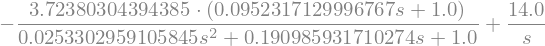

In [10]:
zz = 0.6 # damping
wn = 2*np.pi # freq

# input
W = laplace_transform(Heaviside(t,0), t, s, noconds = True)

# equations of motion (LT of ODE)
eom  = Eq(X(s)*(s**2+2*zz*wn*s+wn**2), 14*wn**2*(-0.075*s+1)*W)
eom.replace(Heaviside(0), 0)

Xofs = solve(eom,X(s))[0]
Xofs.apart()

In [11]:
x_soln = inverse_laplace_transform(Xofs.apart(),s,t)
N(x_soln.simplify(),3)

## Simulate response

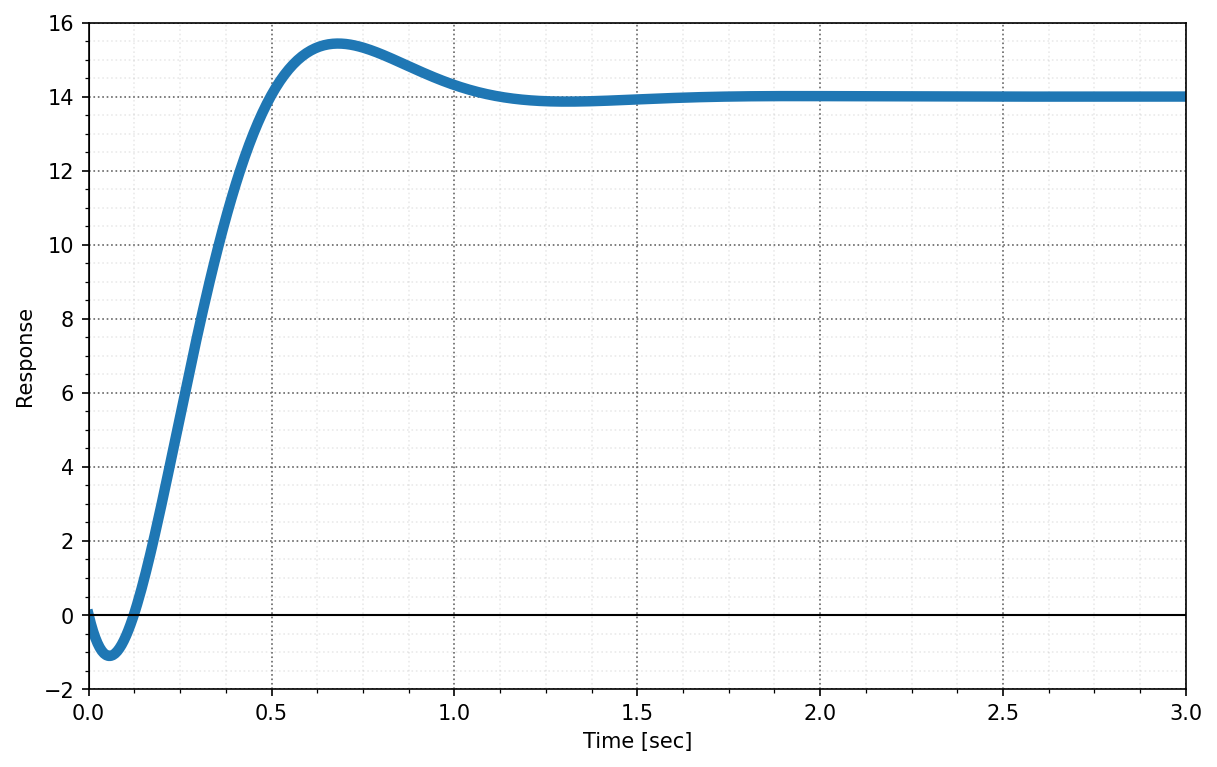

In [13]:
Tf = 3
tt = np.linspace(0,Tf,500)
y = lambda tt: [x_soln.subs(t,x) for x in tt]

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt,y(tt),lw=5)
plt.xlim(0,Tf)
plt.ylim(-2,16)
plt.xlabel('Time [sec]')
plt.ylabel('Response')
plt.savefig('figs/NMP_step_response.png',dpi=300)
nicegrid(ax,7)
plt.show()

## Add zero with location determined by "a"

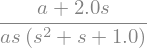

In [6]:
a = Symbol('a')
wn = 1
zz = 0.5

Gs  = Eq(X(s)*s*(s**2+2*zz*wn*s+wn**2), (s*wn/(a*zz)+wn**2))
Gs.replace(Heaviside(0), 0)
Xofs = solve(Gs,X(s))[0]
Xofs

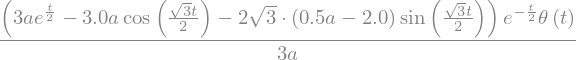

In [7]:
x_soln = inverse_laplace_transform(Xofs,s,t)
x_soln.simplify()